In [96]:
import torch 
from torch import nn


In [97]:
weights = 0.8
bias = 0.2

start = 0
end= 2
step = 0.04


X = torch.arange(start, end, step)
y = weights*X + bias

In [98]:
train_size = int(0.8*len(X))
xtrain = X[:train_size]
ytrain = y[:train_size]
xtest = X[train_size:]
ytest = y[train_size:]

xtrain, xtest

(tensor([0.0000, 0.0400, 0.0800, 0.1200, 0.1600, 0.2000, 0.2400, 0.2800, 0.3200,
         0.3600, 0.4000, 0.4400, 0.4800, 0.5200, 0.5600, 0.6000, 0.6400, 0.6800,
         0.7200, 0.7600, 0.8000, 0.8400, 0.8800, 0.9200, 0.9600, 1.0000, 1.0400,
         1.0800, 1.1200, 1.1600, 1.2000, 1.2400, 1.2800, 1.3200, 1.3600, 1.4000,
         1.4400, 1.4800, 1.5200, 1.5600]),
 tensor([1.6000, 1.6400, 1.6800, 1.7200, 1.7600, 1.8000, 1.8400, 1.8800, 1.9200,
         1.9600]))

In [99]:
#* creating the model 

class liner_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True)
        )
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True)
        )
    
    def forward(self, x):
        return self.weights * x + self.bias
    

In [100]:
model = liner_model()
epochs = 501
learning_rate = 0.01

loss_fn = nn.L1Loss()
opt = torch.optim.SGD(
    params=model.parameters(),
    lr= learning_rate
)

epoch_count = []
train_loss_hist = []
test_loss_hist = []

In [101]:
for epoch in range(epochs):
    model.train()
    
    y_pred = model(xtrain)
    loss = loss_fn(y_pred, ytrain)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    model.eval()
    
    with torch.inference_mode():
        y_test = model(xtest)
        test_loss = loss_fn(y_test, ytest)
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch} | train_loss{loss.item()} | test_loss {test_loss.item()}")
            epoch_count.append(epoch)
            train_loss_hist.append(loss.item())
            test_loss_hist.append(test_loss.item())

Epoch 0 | train_loss1.7885313034057617 | test_loss 3.5730292797088623
Epoch 20 | train_loss1.4668514728546143 | test_loss 3.0953500270843506
Epoch 40 | train_loss1.1472221612930298 | test_loss 2.619170665740967
Epoch 60 | train_loss0.8724688291549683 | test_loss 2.1687350273132324
Epoch 80 | train_loss0.6588817834854126 | test_loss 1.7620906829833984
Epoch 100 | train_loss0.5032408833503723 | test_loss 1.4077467918395996
Epoch 120 | train_loss0.3975336253643036 | test_loss 1.1150672435760498
Epoch 140 | train_loss0.3313991129398346 | test_loss 0.8862853050231934
Epoch 160 | train_loss0.29150503873825073 | test_loss 0.7205708622932434
Epoch 180 | train_loss0.2647494077682495 | test_loss 0.6038010716438293
Epoch 200 | train_loss0.2438954859972 | test_loss 0.5247083902359009
Epoch 220 | train_loss0.2247026413679123 | test_loss 0.4650772213935852
Epoch 240 | train_loss0.20630595088005066 | test_loss 0.42390888929367065
Epoch 260 | train_loss0.1879092901945114 | test_loss 0.3827404975891113

In [102]:
model(xtest).detach()

tensor([1.4807, 1.5126, 1.5445, 1.5764, 1.6083, 1.6403, 1.6722, 1.7041, 1.7360,
        1.7679])

In [103]:
import matplotlib.pyplot as plt
def plot_predictions(predictions=None,
    xtrain = xtrain,
    ytrain = ytrain,
    xtest = xtest,
    ytest = ytest, 
                     ):
    
    
    plt.figure(figsize=(12, 8))
    plt.scatter(xtrain, ytrain, c="blue", marker="o", label="train")
    plt.scatter(xtest, ytest, c="green", marker="o", label="test")
    if predictions is not None:
        plt.scatter(xtest, predictions, c="red", marker="o", label="predictions")
    plt.legend(loc="lower right")
    plt.show()

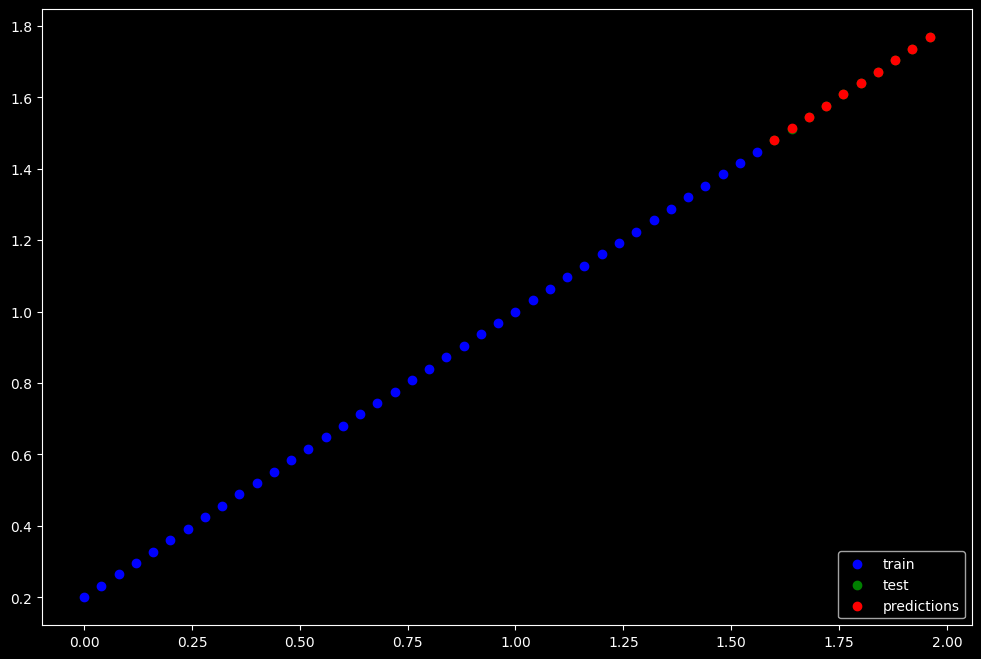

In [104]:
plot_predictions(model(xtest).detach())

In [105]:
train_loss_hist

[1.7885313034057617,
 1.4668514728546143,
 1.1472221612930298,
 0.8724688291549683,
 0.6588817834854126,
 0.5032408833503723,
 0.3975336253643036,
 0.3313991129398346,
 0.29150503873825073,
 0.2647494077682495,
 0.2438954859972,
 0.2247026413679123,
 0.20630595088005066,
 0.1879092901945114,
 0.1695125848054886,
 0.15111592411994934,
 0.1327192336320877,
 0.11435075104236603,
 0.09599170088768005,
 0.07763099670410156,
 0.059268586337566376,
 0.040906183421611786,
 0.02254609763622284,
 0.0041916207410395145,
 0.013418739661574364,
 0.013418739661574364]

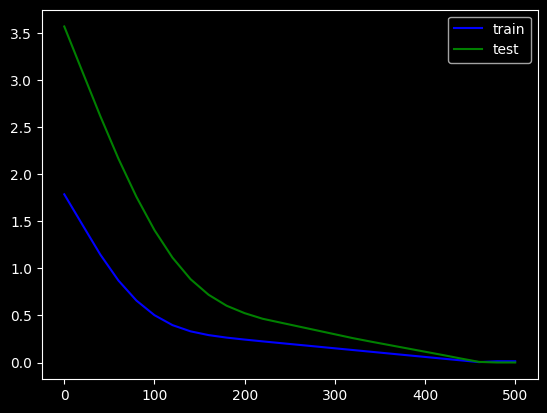

In [106]:
plt.plot(epoch_count, train_loss_hist, c="blue", label="train")
plt.plot(epoch_count, test_loss_hist, c="green", label="test")
plt.legend(loc="best")